# CEE 598: Uncertainty Quantification
## Assignment One
### Noah Garfinkle (garfink2@illinois edu)
### 06 February 2020

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import seaborn as sns

## Problem 1.

In [12]:
results = []
ns = np.linspace(0.1,1000,100)
f = lambda x: n*np.power(1-x,n-1)
for n in ns:
    result = round(quad(f,0,1)[0],2)
    results.append(result)

In [15]:
# for fixed n
singleResults = []
n = 100
xs = np.linspace(0.1,1,100)
for x in xs:
    singleResult = f(x)
    singleResults.append(singleResult)

Text(0, 0.5, 'integral of n(1-x)^(n-1) from 0<=x<=1')

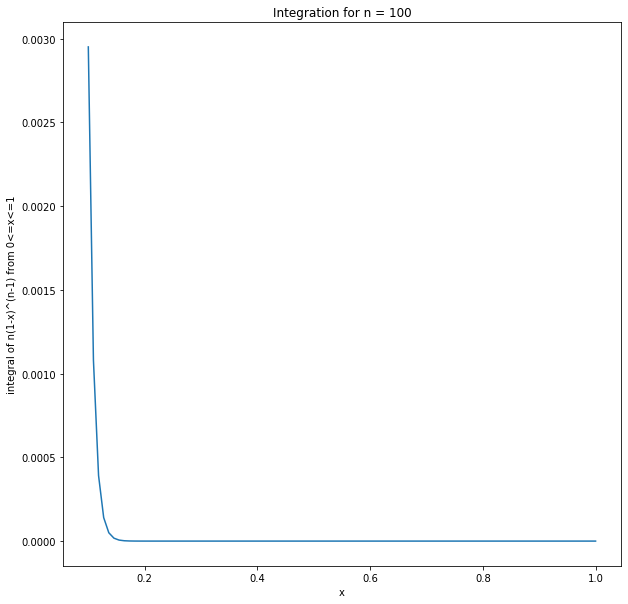

In [16]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(xs,singleResults)
ax.set_title(f"Integration for n = {n}")
ax.set_xlabel("x")
ax.set_ylabel("integral of n(1-x)^(n-1) from 0<=x<=1")

Text(0, 0.5, 'integral of n(1-x)^(n-1) from 0<=x<=1')

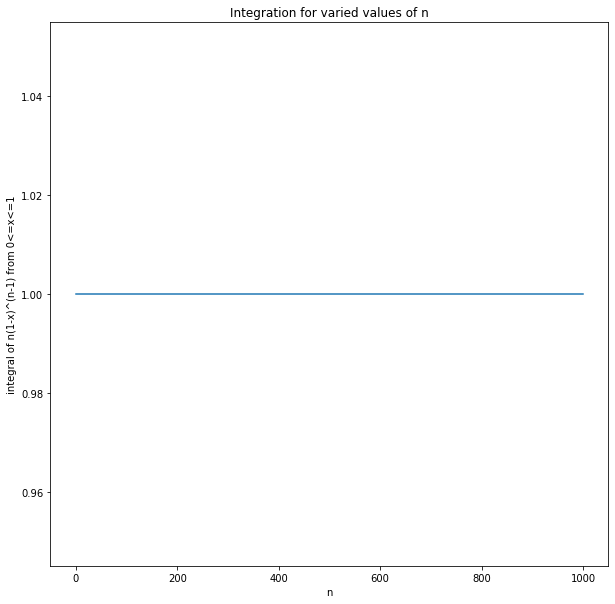

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(ns,results)
ax.set_title("Integration for varied values of n")
ax.set_xlabel("n")
ax.set_ylabel("integral of n(1-x)^(n-1) from 0<=x<=1")

In [11]:
results

[0.999999999916325,
 1.0,
 1.0000000000000002,
 1.0000000000000004,
 1.0000000000000007,
 0.9999999999999999,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999998,
 0.9999999999999996,
 0.9999999999999994,
 1.0000000000000013,
 1.0000000000000016,
 1.0000000000000013,
 1.0000000000000018,
 1.0000000000000018,
 1.000000000000002,
 1.0000000000000018,
 1.000000000000002,
 1.0000000000000022,
 1.0000000000000022,
 1.0000000000000022,
 1.0000000000000024,
 1.0000000000000022,
 1.0000000000000024,
 0.9999999999999996,
 0.9999999999999994,
 0.9999999999999997,
 0.9999999999999996,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999999,
 0.9999999999999999,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999999,
 

## Problem 2.

In [18]:
def pdf(x):
    if x < 4:
        return 0
    elif 4 <= x < 5:
        return 0.4
    elif 5 <= x < 6:
        return 0.3
    elif 6 <= x < 7:
        return 0.3
    elif x > 7:
        return 0

In [38]:
pdf_result = []
currentProb = 0.0
cumulativeProb = []
for x in np.linspace(0,10,1000):
    res = pdf(x)
    currentProb += res
    cumulativeProb.append(currentProb)
    pdf_result.append(res)

Text(0.5, 0, 'x')

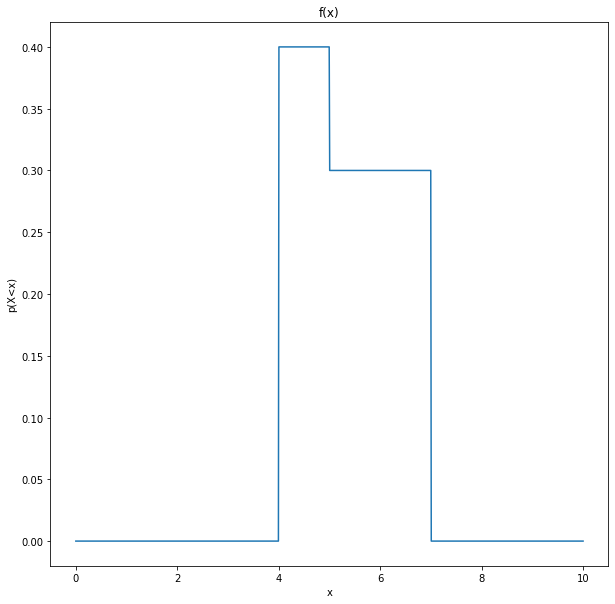

In [26]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),pdf_result)
ax.set_title("f(x)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")

## 2a

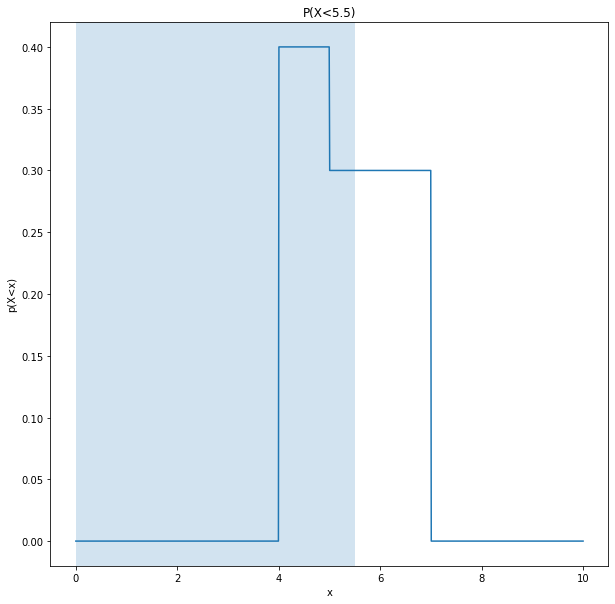

In [33]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),pdf_result)
ax.set_title("P(X<5.5)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")
ax.axvspan(0,5.5,alpha=0.2)

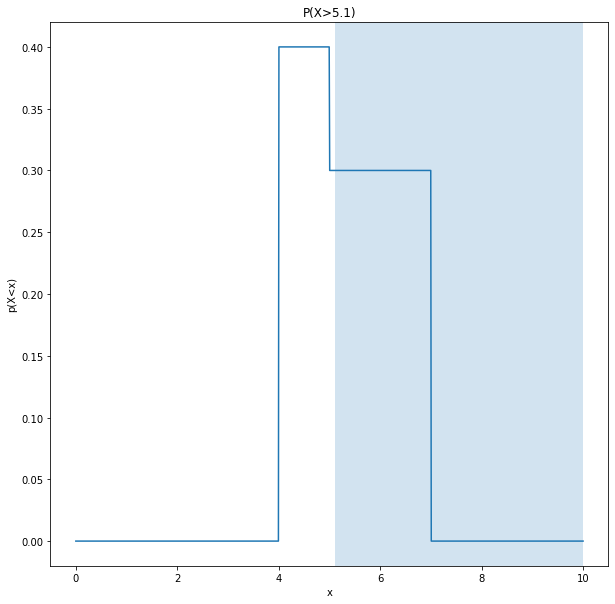

In [35]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),pdf_result)
ax.set_title("P(X>5.1)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")
ax.axvspan(5.1,10,alpha=0.2)

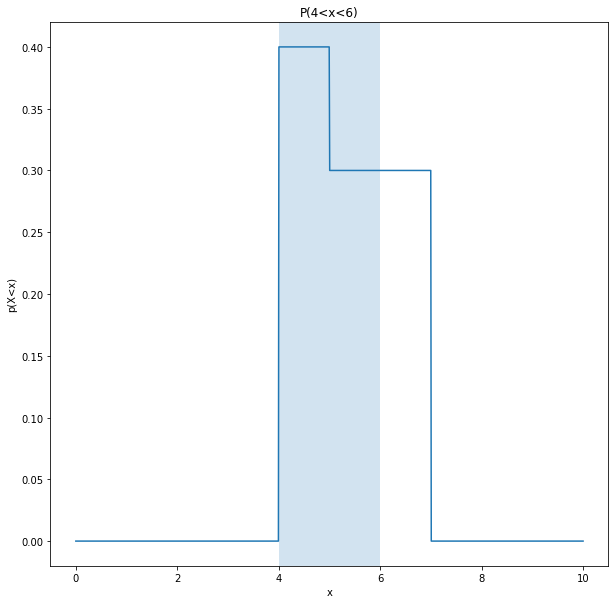

In [37]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),pdf_result)
ax.set_title("P(4<x<6)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")
ax.axvspan(4,6,alpha=0.2)

## 2b

Text(0.5, 0, 'x')

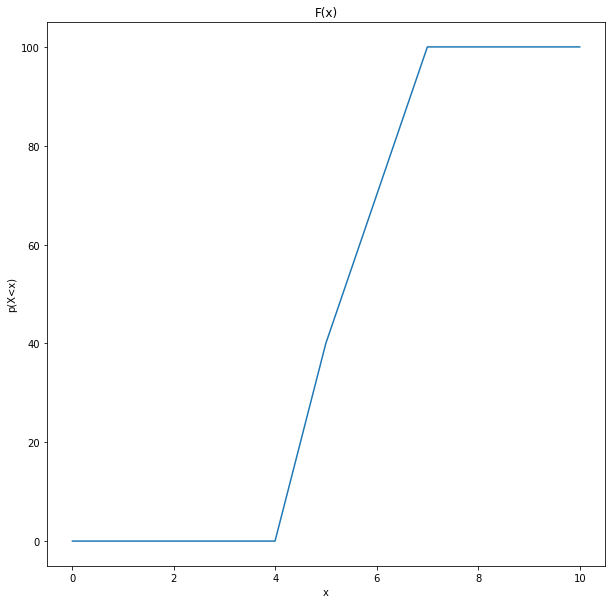

In [39]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),cumulativeProb)
ax.set_title("F(x)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")

In [8]:
#creating a demand function. for a given p, we integrate from theta*t
def Q(p):
    return quad(lambda v: pdf(v),0,np.inf)[0]
# here is the info about the quad function and how to use it: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

In [9]:
Q(10)

TypeError: must be real number, not NoneType

In [ ]:
ps = np.linspace(0.1,3,20) #the range of p's we want too see, from 0.1 to 3
qd = list(map(Q,ps)) #the Q value for each of the p's (this maps the function Q over the list ps)
plt.plot(qd,ps, label="D") #now we plot qd on the horizontal axis and ps on the vertical axis as the curve "D"
#label the axes
plt.xlabel("Q") 
plt.ylabel("P")
plt.legend(loc="upper right") #now add a legend